In [ ]:
!pip install -r requirements.txt

In [5]:
from collections import deque

In [6]:
import numpy as np
import matplotlib.pyplot as plt

In [7]:
%load_ext autoreload
%autoreload 2

from environment import AvalonEnv
from agent import RandomAgent, QTableAgent
from q_learning_trial import train

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [47]:
env = AvalonEnv(5, enable_logs=False, autoplay=False)
CALLBACK_INTERVAL = 2000
     
agent = QTableAgent(env=env)
num_episodes = 150000
rewards, penalties, agent_game_results = train(num_episodes, env, agent, target_reward=5.2, last_n_plot=100, callback_every=CALLBACK_INTERVAL)


Average reward per episode -7.7909999999999995
Average penalties per episode: 3.94
Agent won 43.63636363636363% games out of 55 games while taking SERVANT role.
Agent won 28.888888888888886% games out of 45 games while taking MINION role.
Saving new best model to q_table.pickle

Average reward per episode -7.711
Average penalties per episode: 4.36
Agent won 39.34426229508197% games out of 61 games while taking SERVANT role.
Agent won 30.76923076923077% games out of 39 games while taking MINION role.
Saving new best model to q_table.pickle

Average reward per episode -7.4479999999999995
Average penalties per episode: 3.69
Agent won 21.951219512195124% games out of 41 games while taking MINION role.
Agent won 32.20338983050847% games out of 59 games while taking SERVANT role.
Saving new best model to q_table.pickle

Average reward per episode -7.201999999999997
Average penalties per episode: 4.59
Agent won 50.0% games out of 72 games while taking SERVANT role.
Agent won 32.1428571428571


Average reward per episode -6.531999999999999
Average penalties per episode: 3.73
Agent won 46.2962962962963% games out of 54 games while taking SERVANT role.
Agent won 23.91304347826087% games out of 46 games while taking MINION role.
Saving new best model to q_table.pickle

Average reward per episode -6.6419999999999995
Average penalties per episode: 3.86
Agent won 32.30769230769231% games out of 65 games while taking SERVANT role.
Agent won 22.857142857142858% games out of 35 games while taking MINION role.
Saving new best model to q_table.pickle

Average reward per episode -5.986999999999999
Average penalties per episode: 4.08
Agent won 41.17647058823529% games out of 68 games while taking SERVANT role.
Agent won 31.25% games out of 32 games while taking MINION role.
Saving new best model to q_table.pickle

Average reward per episode -6.043000000000001
Average penalties per episode: 3.7
Agent won 39.285714285714285% games out of 56 games while taking SERVANT role.
Agent won 27.272


Average reward per episode -5.9559999999999995
Average penalties per episode: 3.57
Agent won 33.89830508474576% games out of 59 games while taking SERVANT role.
Agent won 21.951219512195124% games out of 41 games while taking MINION role.
Saving new best model to q_table.pickle

Average reward per episode -6.095999999999998
Average penalties per episode: 3.89
Agent won 24.390243902439025% games out of 41 games while taking MINION role.
Agent won 45.76271186440678% games out of 59 games while taking SERVANT role.
Saving new best model to q_table.pickle

Average reward per episode -6.569
Average penalties per episode: 4.26
Agent won 28.205128205128204% games out of 39 games while taking MINION role.
Agent won 44.26229508196721% games out of 61 games while taking SERVANT role.
Saving new best model to q_table.pickle

Average reward per episode -5.620999999999998
Average penalties per episode: 4.25
Agent won 47.76119402985074% games out of 67 games while taking SERVANT role.
Agent won 39.

## Plotting results

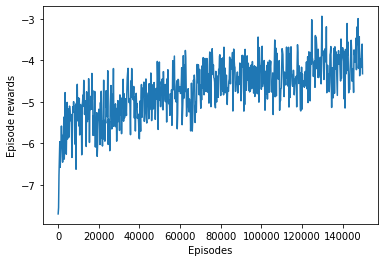

In [50]:
selected_rewards = []
timesteps = []

for t, r in enumerate(rewards):
    if t % 200 == 0:
        selected_rewards.append(r)
        timesteps.append(t)
        
plt.plot(timesteps, selected_rewards)
plt.xlabel('Episodes')
plt.ylabel('Episode rewards')
plt.show()

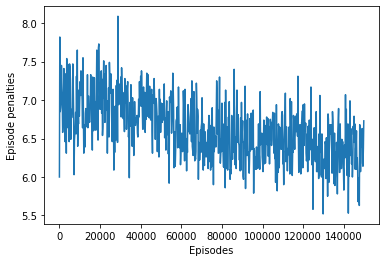

In [51]:
selected_penalties = []
timesteps = []

for t, r in enumerate(penalties):
    if t % 200 == 0:
        selected_penalties.append(r)
        timesteps.append(t)
        
plt.plot(timesteps, selected_penalties)
plt.xlabel('Episodes')
plt.ylabel('Episode penalties')
plt.show()

## Explaining the Q-table

In [52]:
from flatten_dict import flatten
from game.enums_and_config import CharacterType

servant_table = sorted(flatten(agent.q_table[CharacterType.SERVANT]).items(), key=lambda x: x[1])

In [53]:
most_positive_q_servant = servant_table[-20:]
most_positive_q_servant

[(((0, 82, 82, 64, 81, 2, 2, 1, 4), (7, 0, 0)), 1.758940204521636),
 (((0, 82, 81, 82, 64, 2, 2, 2, 0), (18, 0, 2)), 1.7638906630568199),
 (((18, 64, 81, 64, 82, 1, 2, 1, 4), (9, 1, 0)), 1.8386920936698714),
 (((4, 68, 80, 80, 64, 2, 1, 1, 2), (0, 0, 2)), 1.8647179146014865),
 (((1, 82, 64, 81, 81, 2, 2, 1, 3), (12, 0, 1)), 1.8748849783421992),
 (((17, 64, 64, 64, 81, 1, 1, 1, 2), (0, 1, 0)), 1.90238715815019),
 (((0, 81, 64, 81, 64, 2, 1, 3, 0), (16, 0, 1)), 1.930294527537327),
 (((1, 68, 68, 85, 82, 2, 3, 2, 1), (15, 0, 2)), 1.9533852470227393),
 (((4, 65, 82, 82, 68, 2, 3, 2, 0), (0, 1, 2)), 1.9534805154307135),
 (((0, 82, 82, 65, 80, 2, 2, 1, 4), (10, 0, 1)), 1.970279092686866),
 (((4, 81, 81, 81, 68, 2, 2, 3, 0), (19, 0, 2)), 1.9861219533999979),
 (((4, 81, 81, 64, 85, 2, 2, 2, 4), (3, 0, 2)), 1.9948045866776332),
 (((4, 85, 64, 81, 81, 2, 2, 1, 3), (0, 0, 2)), 2.004354645696974),
 (((17, 68, 69, 84, 66, 1, 3, 2, 0), (0, 1, 0)), 2.0044171274158202),
 (((5, 82, 82, 64, 68, 2, 3, 1,

```
class ActionType(Enum):
    """
    Different action types.
    """
    TEAM_SELECTION = 0
    TEAM_APPROVAL = 1
    QUEST_VOTE = 2
```

`# Player visibilites, action type, current quest, proposal number, current leader`

What the q learning agent has learnt to do when he's on good team?

From the top 20, its evident the agent has mostly developed huristic about action type 1 and 2 (team approval and quest vote), kind of expected becaues action type 0 (team selection) has a lot of possible values unlike these actions so learning a strong heuristic for that particular can be difficult and will require lots of training samples.
e, 



In [54]:
most_negative_q_servant = servant_table[:20]
most_negative_q_servant

[(((24, 80, 80, 68, 72, 1, 2, 1, 3), (12, 2, 1)), -2.663801501559158),
 (((24, 84, 68, 80, 68, 1, 2, 1, 3), (2, 0, 0)), -2.634865387121228),
 (((20, 65, 84, 81, 68, 1, 2, 1, 4), (17, 0, 1)), -2.624924361002295),
 (((4, 88, 84, 64, 84, 2, 2, 1, 3), (8, 2, 0)), -2.581487111833827),
 (((1, 88, 88, 68, 65, 2, 3, 2, 0), (7, 2, 0)), -2.5526947288676447),
 (((8, 85, 64, 69, 84, 2, 3, 1, 4), (7, 2, 0)), -2.5500714954447123),
 (((21, 85, 64, 80, 68, 1, 2, 1, 3), (4, 0, 1)), -2.47490585598706),
 (((20, 81, 64, 65, 85, 1, 2, 2, 4), (14, 0, 1)), -2.4703585188761092),
 (((1, 88, 88, 65, 68, 2, 3, 1, 4), (17, 1, 1)), -2.4617942819210437),
 (((8, 80, 84, 68, 84, 2, 2, 1, 3), (7, 1, 0)), -2.460350180879209),
 (((16, 80, 80, 64, 64, 1, 0, 3, 3), (7, 1, 2)), -2.447133563279076),
 (((16, 64, 64, 68, 84, 1, 1, 1, 3), (14, 0, 2)), -2.437400053907436),
 (((24, 84, 68, 65, 69, 1, 3, 1, 0), (10, 0, 1)), -2.4341359504935753),
 (((16, 65, 65, 80, 64, 1, 1, 1, 2), (7, 1, 2)), -2.4329953798022848),
 (((20, 64, 84

In [55]:
from game.enums_and_config import PlayerVisibility, team_selection_move_map

inv_map = {PlayerVisibility[k] : k for k in PlayerVisibility}


# Inspecting the most positive q-value entry and transalting it into plain english. The numerical values 
# can be mapped to the action_types and visibility_class by checking the enum_and_config file.
for entry in most_positive_q_servant[-1:]:
    s, action = entry[0]
    q_val = entry[1]
    
    print('Player configuration')
    for i in range(5):
        vis = inv_map[s[i]]
        f_string = f'''
         Player {i}. {vis[0]} team, {'a' if vis[1] else 'not a'} part of current team, havinig a history of {vis[2]} failed missions and  {vis[3]} passed missions.
        '''
        print(f_string)
    
    print(f'The Q-value of Player 0 taking action {action} when the five players in the above state is {q_val}')

Player configuration

         Player 0. Team.GOOD team, not a part of current team, havinig a history of 0 failed missions and  2 passed missions.
        

         Player 1. Team.UNKNOWN team, a part of current team, havinig a history of 1 failed missions and  0 passed missions.
        

         Player 2. Team.UNKNOWN team, a part of current team, havinig a history of 1 failed missions and  0 passed missions.
        

         Player 3. Team.UNKNOWN team, a part of current team, havinig a history of 1 failed missions and  0 passed missions.
        

         Player 4. Team.UNKNOWN team, not a part of current team, havinig a history of 0 failed missions and  2 passed missions.
        
The Q-value of Player 0 taking action (0, 1, 0) when the five players in the above state is 2.2044509755607264


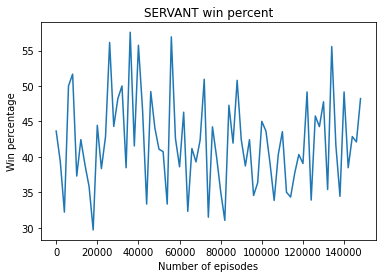

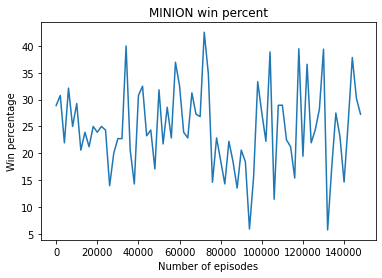

In [56]:
for ctype, win_data in agent_game_results.items():
    plt.plot(np.arange(len(win_data)) * CALLBACK_INTERVAL, win_data)
    plt.xlabel('Number of episodes')
    plt.ylabel('Win percentage')
    plt.title(f'{ctype.name} win percent')
    plt.show()